In [1]:
import numpy as np
import igraph as ig
from collections import Counter, deque, defaultdict
import multiprocessing as mp
import matplotlib.pyplot as plt
from functools import partial
from helpers_dynamics_axelrod import *
from helpers_phase_transitions import *

## Load network and fix parameters

In [2]:
g = ig.Graph.Read_GML('bfmaier_anonymized_fb_network.gml')

In [3]:
steps = 20_000_000
runs = 10
q_values = [2,10,40,80,120,200]  # number of traits
F = 5   # number of features
N = g.vcount()
save_interval = 10000

### Basic network properties

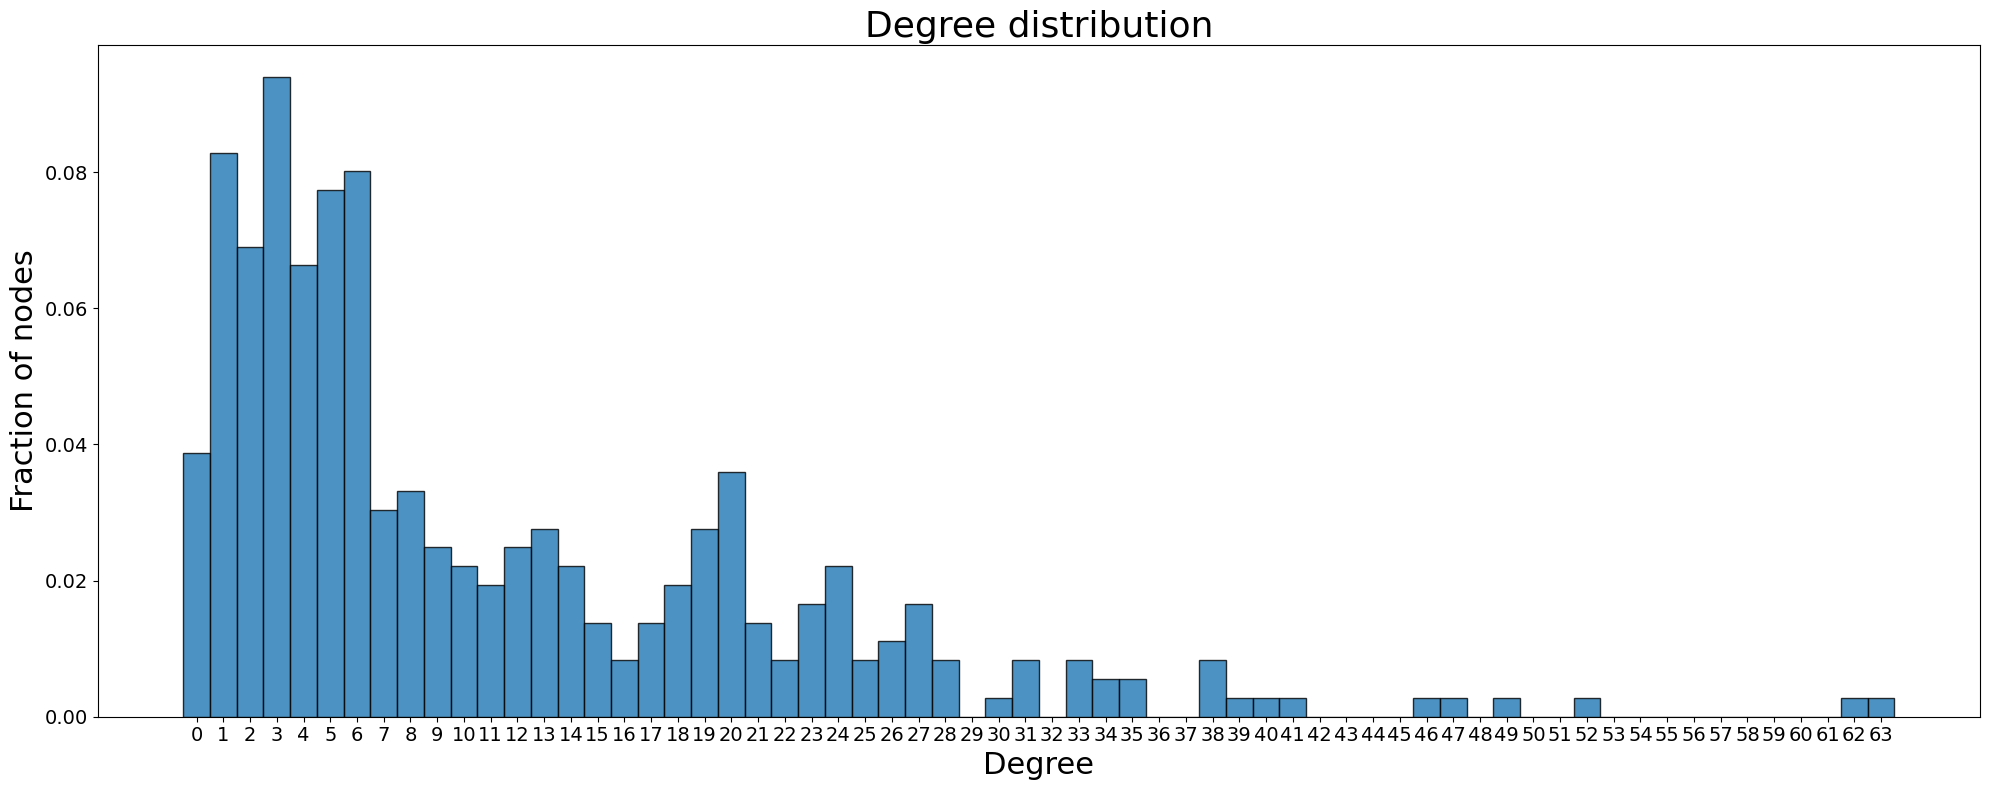

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import igraph as ig

degrees = g.degree()

# Create histogram
min_deg = min(degrees)
max_deg = max(degrees)

bins = np.arange(min_deg - 0.5, max_deg + 1.5, 1) 

plt.figure(figsize=(20,8))
plt.hist(degrees, bins=bins, edgecolor='black', alpha=0.8, density=True)


plt.title("Degree distribution", fontsize=26)
plt.xlabel("Degree", fontsize=22)
plt.ylabel("Fraction of nodes", fontsize=22)
plt.xticks(range(min_deg, max_deg+1), fontsize = 14)  
plt.yticks(fontsize = 14)
plt.grid(False)
plt.tight_layout()
plt.savefig("Maier_degrees.pdf")
plt.show()


In [17]:
clustering = g.transitivity_undirected()
avg_path_length = g.average_path_length()

In [18]:
print("Clustering =", clustering)
print("avg. path length =", avg_path_length)

Clustering = 0.5133740599216297
avg. path length = 3.5824428187795165


## Evolution simulation

In [7]:
Smax_per_q,active_bonds_per_q,std_Smax_per_q,std_active_bonds_per_q = run_simulations(F=F, q_values=q_values, is_real=True, real_g = g, N = g.vcount(), type=None, p=None, m=None, nei=None, p_ws=None)

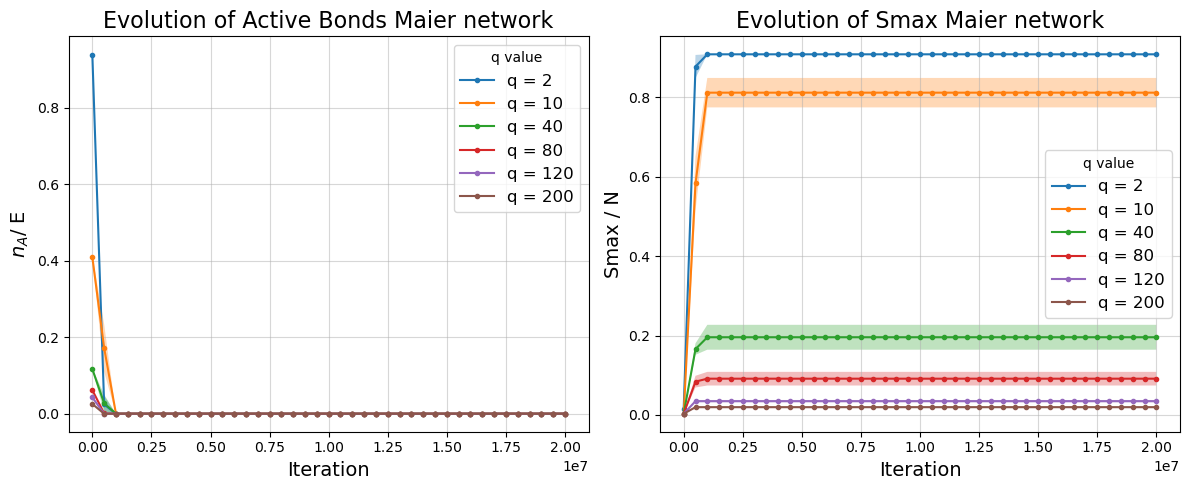

In [9]:
plot_evolution(Smax_per_q,active_bonds_per_q,std_Smax_per_q,std_active_bonds_per_q,q_values,'Evolution of Active Bonds Maier network', 'Evolution of Smax Maier network',
               plotname='evolution_plot_maier.pdf')


## Phase transition comparison

In [10]:
def plot_phase_transition_all(q_values,Smax_per_q_ER, std_Smax_per_q_ER,Smax_per_q_WS, std_Smax_per_q_WS,
                              Smax_per_q_BA, std_Smax_per_q_BA,Smax_per_q_real, std_Smax_per_q_real,title):

    plt.figure(figsize=(9,6))

    
    plt.errorbar(q_values, Smax_per_q_ER, yerr=std_Smax_per_q_ER,
                 fmt='-o', color="blue", capsize=5, markersize=7,
                 label="ER", alpha=0.9, linewidth=2)

    plt.errorbar(q_values, Smax_per_q_WS, yerr=std_Smax_per_q_WS,
                 fmt='-s', color="green", capsize=5, markersize=7,
                 label="WS", alpha=0.9, linewidth=2)

    plt.errorbar(q_values, Smax_per_q_BA, yerr=std_Smax_per_q_BA,
                 fmt='-^', color="orange", capsize=5, markersize=7,
                 label="BA", alpha=0.9, linewidth=2)

    plt.errorbar(q_values, Smax_per_q_real, yerr=std_Smax_per_q_real,
                 fmt='-D', color="red", capsize=5, markersize=8,
                 label="Real network", alpha=1.0, linewidth=2.5)

    plt.title(title, fontsize=16)
    plt.xlabel("q", fontsize=14)
    plt.ylabel("Smax/N", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylim(0, 1.05)
    plt.grid(alpha=0.3, linestyle="-")
    plt.legend(fontsize=12, frameon=True)
    plt.tight_layout()
    plt.savefig('real_network.pdf')
    plt.show()


In [11]:
# --- Parameters
steps = 20_000_000
runs = 10
q_values = [2, 10, 20, 40, 60, 80, 100, 120, 140, 150, 160, 180, 200]
F = 5     # number of features
N = g.vcount()
save_interval = 10000

### Maier

In [13]:
Smax_per_q, std_Smax_per_q = run_phase_transition_simulation(F, q_values, N, is_real = True, real_g = g, type=None, p=None, m=5, nei=None, p_ws=None)

q = 2
q = 10
q = 20
q = 40
q = 60
q = 80
q = 100
q = 120
q = 140
q = 150
q = 160
q = 180
q = 200


### ER

In [14]:
Smax_per_q_ER, std_Smax_per_q_ER = run_phase_transition_simulation(F, q_values, N = g.vcount(), type='ER', p=0.03, m=None, nei=None, p_ws=None)

q = 2
q = 10
q = 20
q = 40
q = 60
q = 80
q = 100
q = 120
q = 140
q = 150
q = 160
q = 180
q = 200


### BA


In [17]:
Smax_per_q_BA, std_Smax_per_q_BA = run_phase_transition_simulation(F, q_values, N = g.vcount(), type='BA', p=None, m=5, nei=None, p_ws=None)

q = 2
q = 10
q = 20
q = 40
q = 60
q = 80
q = 100
q = 120
q = 140
q = 150
q = 160
q = 180
q = 200


### WS

In [18]:
Smax_per_q_WS, std_Smax_per_q_WS = run_phase_transition_simulation(F, q_values, N = g.vcount(), type='WS', p=None, m=None, nei=5, p_ws=0.03)

q = 2
q = 10
q = 20
q = 40
q = 60
q = 80
q = 100
q = 120
q = 140
q = 150
q = 160
q = 180
q = 200


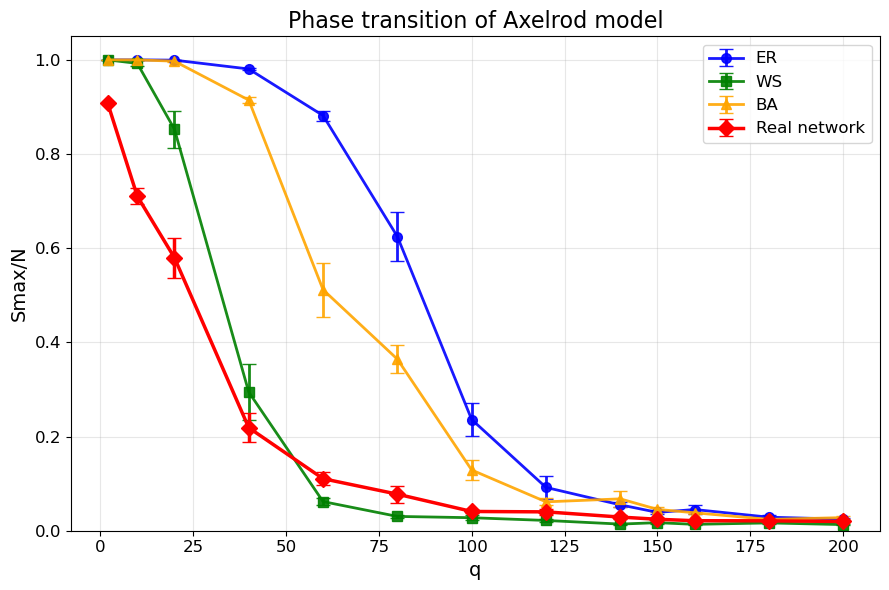

In [19]:
plot_phase_transition_all(
    q_values,
    Smax_per_q_ER, std_Smax_per_q_ER,
    Smax_per_q_WS, std_Smax_per_q_WS,
    Smax_per_q_BA, std_Smax_per_q_BA,
    Smax_per_q, std_Smax_per_q,  
    title="Phase transition of Axelrod model"
)
